# Music Recommendation using Spotify API 

This Notebook will go through with <b>Data Cleaning</b>, <b>Data Selecting</b>, <b>Data Visualization</b> and <b>Music Recommendation using Spotify API</b>

The data is collected from Kaggle

The content of notebook:
1. Data Cleaning
2. Separating Data before and after year 2000
3. Integrating Spotify API and writing functions to get song attributes
4. Recommendation System using Cosine Similarity
5. Putting all together
6. Further Scope

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('D:/Others/New folder/tracks_features.csv')
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [4]:
df.shape

(1204025, 24)

### Data Cleaning 

In [5]:
#Remove rows where all values are 0
df = df[(df['danceability']!=0) & (df['energy']!=0) & (df['speechiness']!=0) & (df['acousticness']!=0) 
        & (df['instrumentalness']!=0) & (df['valence']!=0)]

#dropping duplicate values. Mostly if the song is explicit or not
df = df.drop_duplicates(["name","artists"],keep = 'first')

#Removing [' '] which are present at the start and end of artists and artists_id
df['artists'] = df['artists'].apply(lambda x: x[2:-2])
df['artist_ids'] = df['artist_ids'].apply(lambda x: x[2:-2])

#Removing year equal to 0
df = df[df['year'] != 0]

#Removing if artist is not present
df = df[~df['artists'].isna()]

Dropping columns which won't be needed as we move ahead

In [6]:
df.drop(['id','album_id','artist_ids','track_number','disc_number','explicit','key','liveness','mode','loudness','duration_ms','time_signature','release_date'], axis=1,inplace=True)

In [7]:
df.shape

(926294, 11)

In [8]:
df.corr()

,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,year
danceability,1.000000,0.290942,0.131025,-0.286995,-0.237270,0.564449,0.075789,0.064371
energy,0.290942,1.000000,0.184011,-0.808546,-0.249294,0.399442,0.291366,0.155959
speechiness,0.131025,0.184011,1.000000,-0.122224,-0.102752,0.046464,0.058508,0.054761
acousticness,-0.286995,-0.808546,-0.122224,1.000000,0.242252,-0.273651,-0.253854,-0.164759
instrumentalness,-0.237270,-0.249294,-0.102752,0.242252,1.000000,-0.253787,-0.084738,0.010121
valence,0.564449,0.399442,0.046464,-0.273651,-0.253787,1.000000,0.188633,-0.067354
tempo,0.075789,0.291366,0.058508,-0.253854,-0.084738,0.188633,1.000000,0.046411
year,0.064371,0.155959,0.054761,-0.164759,0.010121,-0.067354,0.046411,1.000000


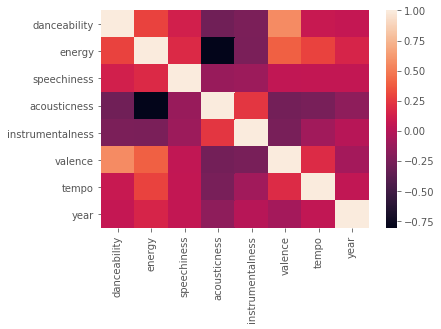

In [9]:
sns.heatmap(df.corr());

Valence and Danceability & Energy and Valence are closely related among all others

In [10]:
#import plotly.express as px 

In [7]:
grouped_df_year = df.groupby('year')['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence'].mean()

C:\Users\Yash\AppData\Local\Temp/ipykernel_9196/329173965.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df_year = df.groupby('year')['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence'].mean()


From the graph below we can see acousticness decreasing over time while instrumentalness had a pretty big up-down before stabilizing. The energy can also be seen increasing slightly over time

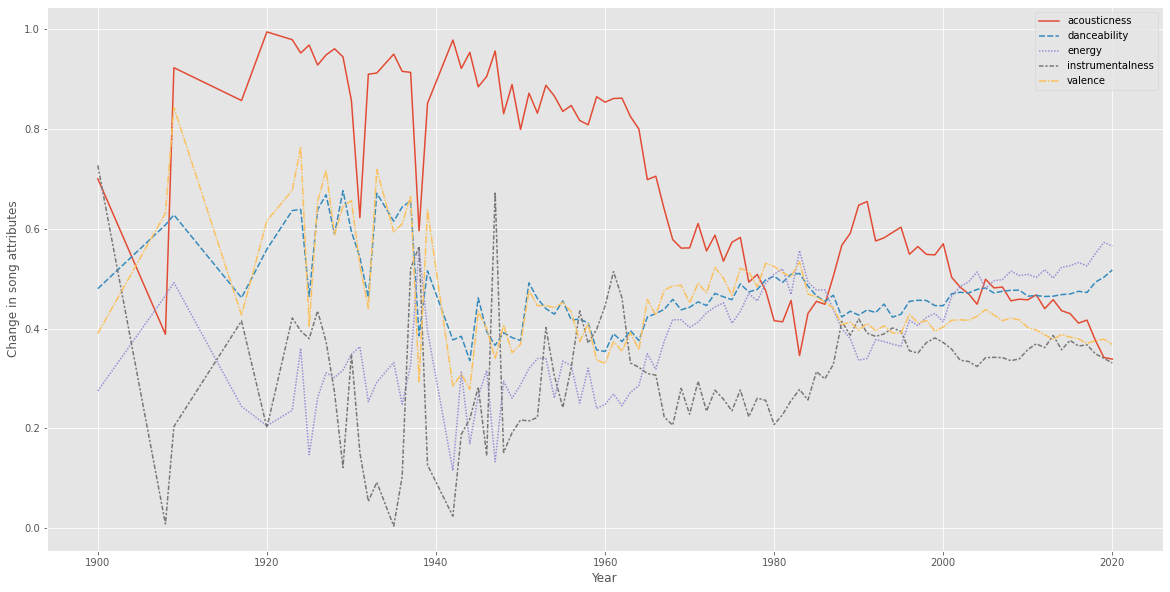

"\nsound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']\nfig = px.line(grouped_df_year, x=grouped_df_year.index, y=sound_features)\nfig.show()\n"

In [11]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data = grouped_df_year)
ax.set(xlabel="Year", ylabel = "Change in song attributes")
plt.show()
"""
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
fig = px.line(grouped_df_year, x=grouped_df_year.index, y=sound_features)
fig.show()
"""

### We will see the distribution of songs before and after the year 2000

In [43]:
df_2000_plus = df[df['year']>=2000]
df_2000_minus = df[df['year']<2000]
print("Number of songs after year 2000: " + str(len(df_2000_plus)))
print("Number of songs before year 2000: " + str(len(df_2000_minus)))

Number of songs after year 2000: 761216
Number of songs before year 2000: 165078


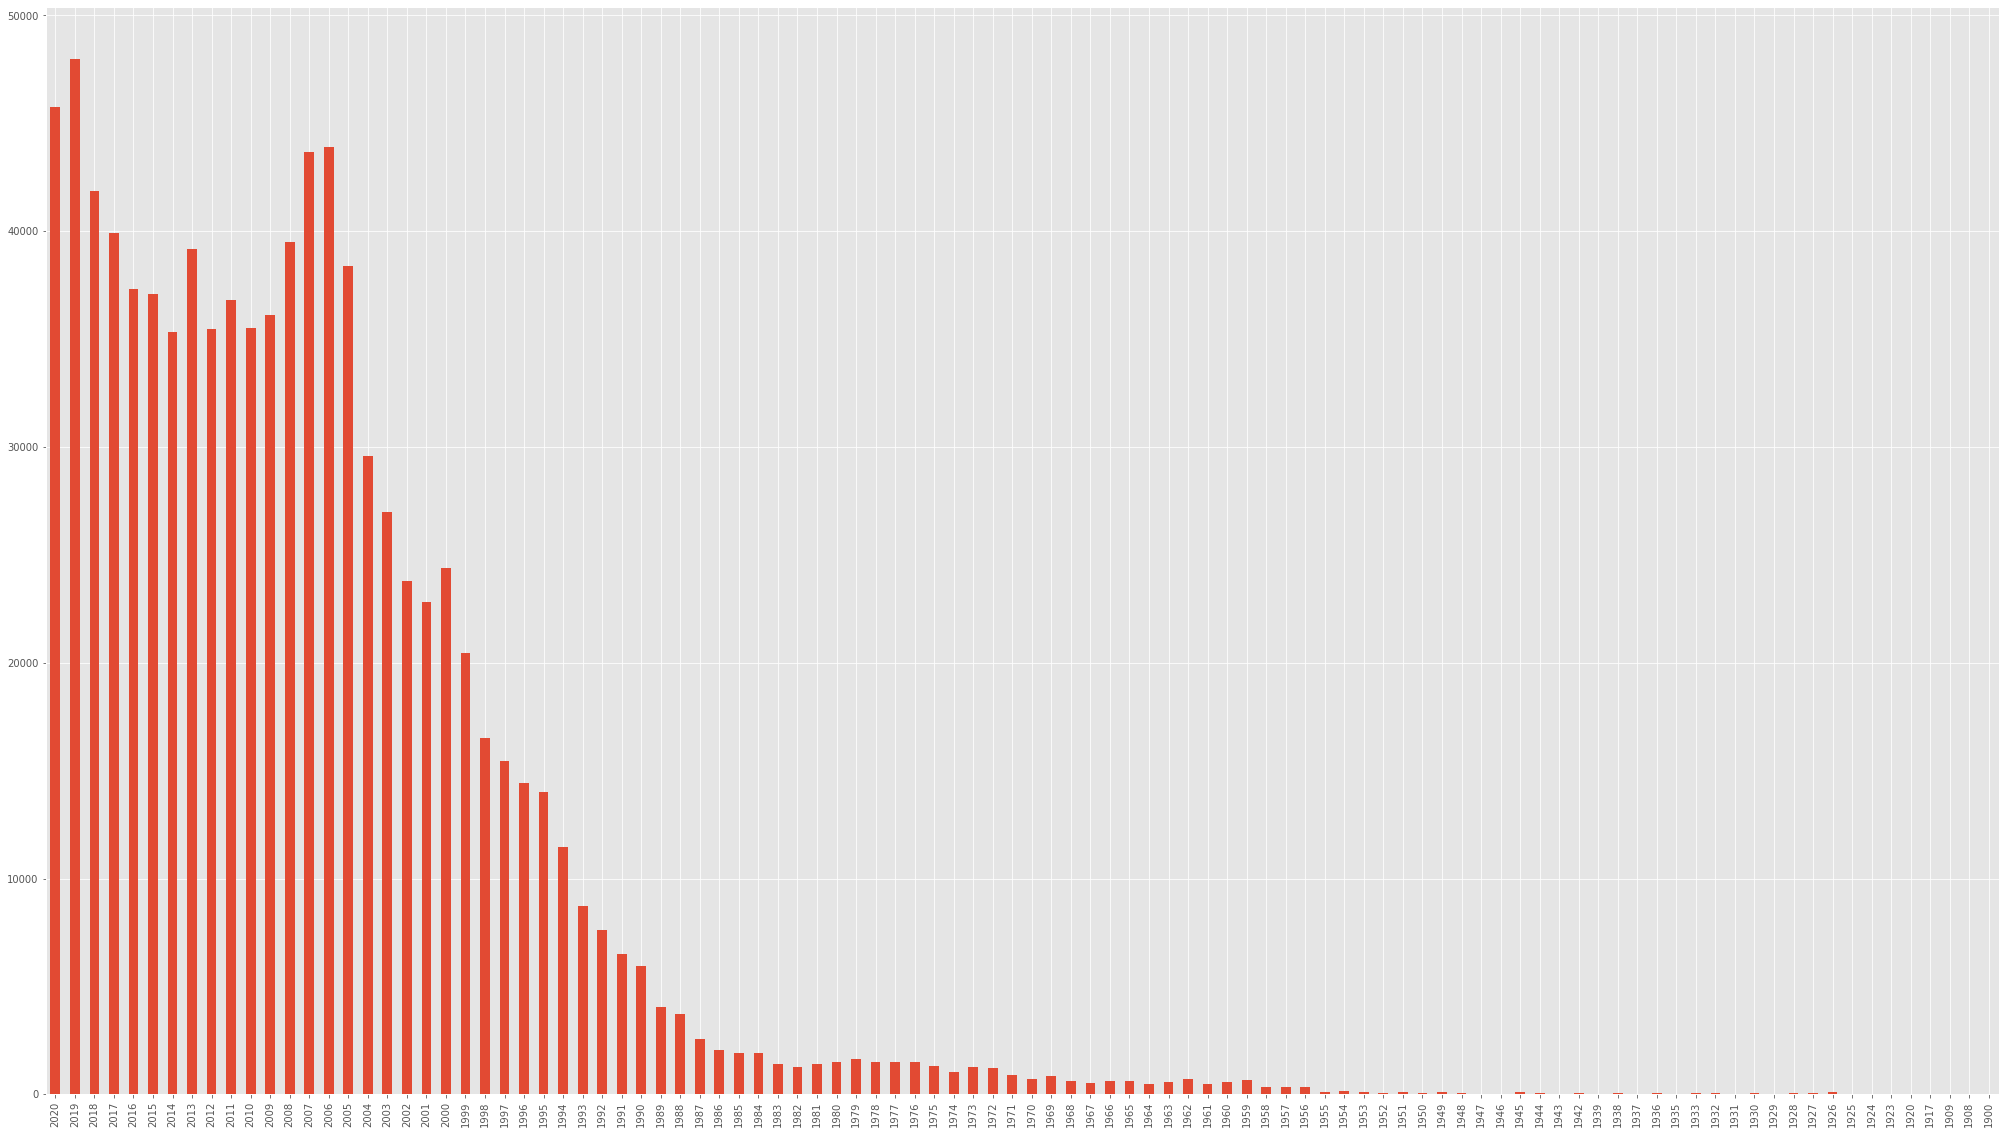

In [42]:
plt.figure(figsize=(35,20))
df['year'].value_counts().sort_index(ascending = False).plot(kind='bar')
plt.show()

### Since we have many songs over the year 2000, we'll select them

In [15]:
df_2000_plus = df[df['year']>=2000]
df_2000_plus = df_2000_plus.reset_index(drop=True)

In [16]:
df_2000_plus.to_csv('/cleaned_2000plus.csv')

In [17]:
df_2000_plus = pd.read_csv('/cleaned_2000plus.csv')
df_2000_plus = df_2000_plus.drop(columns=['Unnamed: 0'])

In [18]:
df_2000_plus.head()

,name,album,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,year
0,Man on a Mission,Do It for Love,Daryl Hall & John Oates,0.787,0.903,0.0315,0.2920,0.000025,0.962,119.946,2018
1,Someday We'll Know,Do It for Love,Daryl Hall & John Oates,0.565,0.781,0.0308,0.0233,0.000010,0.461,109.977,2018
2,Forever for You,Do It for Love,Daryl Hall & John Oates,0.651,0.567,0.0240,0.5620,0.000006,0.370,97.030,2018
3,Life's Too Short,Do It for Love,Daryl Hall & John Oates,0.833,0.805,0.0347,0.0760,0.013600,0.974,116.013,2018
4,Love in a Dangerous Time,Do It for Love,Daryl Hall & John Oates,0.593,0.950,0.0403,0.1830,0.000251,0.791,99.016,2018


Reducing the size of datatype

In [19]:
df_2000_plus['danceability'] = df_2000_plus['danceability'].astype(np.float32)
df_2000_plus['energy'] = df_2000_plus['energy'].astype(np.float32)
df_2000_plus['speechiness'] = df_2000_plus['speechiness'].astype(np.float32)
df_2000_plus['acousticness'] = df_2000_plus['acousticness'].astype(np.float32)
df_2000_plus['instrumentalness'] = df_2000_plus['instrumentalness'].astype(np.float32)
df_2000_plus['valence'] = df_2000_plus['valence'].astype(np.float32)
df_2000_plus['tempo'] = df_2000_plus['tempo'].astype(np.float32)

In [20]:
df_2000_plus.shape

(761216, 11)

Paradise song by Coldplay being present in the database

In [21]:
df_2000_plus[(df_2000_plus['name'].str.contains('Paradise')) & (df_2000_plus['artists'].str.contains('Coldplay'))]

,name,album,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,year
549711,Paradise - Live in Buenos Aires,Live in Buenos Aires,Coldplay,0.189,0.872,0.051,0.00193,0.0187,0.19,138.660995,2018


Hello song by Adele is not present in the database

In [41]:
df_2000_plus[(df_2000_plus['name'].str.contains('Hello')) & (df_2000_plus['artists'].str.contains('Adele'))]

,name,album,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,year


Since we see some songs are not present, if the user has to select the song and get attributes we have to use the Spotify API

### Spotify API Integration 

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [23]:
client_id = "<----->"
client_secret = "<----->"
auth_manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [24]:
def check_if_in_db(song,artist,data):
    """
    this function checks if the song is present in the database or not.
    @input song: song name
    @input artist: artist name
    @input data: the dataframe
    @return False if data not present in dataframe, else the song attributes
    """
    try:
        song_and_artist = data[(data['name'].str.contains("(?i)"+song,case=False, na=False)) & 
                               (data['artists'].str.contains("(?i)"+artist,case=False, na=False))]
        if (song_and_artist.empty):
            return False
        else:
            sound_properties = song_and_artist.loc[:,['name','artists','danceability','energy','speechiness',
                                                      'acousticness','instrumentalness', 'valence']]
            return sound_properties
    except:
        return False

def get_song_value(title,artist,data):
    """
    this function gets the song value. it first checks the database. If not there, it gets song via API
    @input title: song name
    @input artist: artist name
    @input data: the dataframe
    @return False if song not found, else the song attributes
    """
    
    present = check_if_in_db(title,artist,data)
    #present = True
    
    if (type(present) == bool):
        try:
            tracks = sp.search(title, limit=10, type='track')
            
            for i in range(0,len(tracks['tracks']['items'])):
                if (tracks['tracks']['items'][i]['artists'][0]['name'].casefold() == artist.casefold()):
                    song_id = tracks['tracks']['items'][i]['id']
            
            test_dict = sp.audio_features(song_id)[0]

            res = {key: test_dict[key] for key in test_dict.keys() & {'danceability','energy','speechiness',
                                                                      'acousticness', 'instrumentalness', 'valence'}}

            df = pd.DataFrame(res,index=[0])
            df['name'] = title
            df['artists'] = artist


            df = df[['name','artists','danceability','energy','speechiness','acousticness',
                     'instrumentalness','valence']]
            return df
        except Exception as e:
            return False
    
    else:
        return present

In [25]:
song_value = get_song_value('paradise','coldplay',df_2000_plus)

In [26]:
song_value

,name,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence
549711,Paradise - Live in Buenos Aires,Coldplay,0.189,0.872,0.051,0.00193,0.0187,0.19


Ticket to Ride by Kawala was not present in the database, so it got the attribute from Spotify API. The 0 index signifies that song is not present in the database

In [28]:
song_value = get_song_value('ticket to ride','kawala',df_2000_plus)

In [29]:
song_value

,name,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,ticket to ride,kawala,0.575,0.782,0.0771,0.278,0.000039,0.749


In [44]:
song_value = get_song_value('hello','adele',df_2000_plus)
song_value

,name,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,hello,adele,0.578,0.43,0.0305,0.33,0,0.288


## Cosine Similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity as cs

In [31]:
def recommend_songs_by_similarity(song_data,data=df_2000_plus):
    """
    this function finds the similarity between input and songs in database.
    @input song_data: song attributes that we find from the 'get_song_value()' function
    @input data: the dataframe
    @return top 5 similar songs, else error
    """
    try:        
        similar_songs = data.copy()       
        sound_properties = similar_songs.loc[:,['danceability','energy','speechiness','acousticness',
                                                'instrumentalness', 'valence']]
        
        similar_songs['Similarity'] = cs(sound_properties,song_data.iloc[:,2:].to_numpy()).squeeze() 
        
        similar_songs = similar_songs.sort_values(by="Similarity",ascending=False)
        similar_songs = similar_songs[['artists','name','year','Similarity']]
        similar_songs.reset_index(drop=True,inplace=True)
        
        if(song_data.iloc[0,0]== similar_songs.iloc[0,1] and song_data.iloc[0,1]== similar_songs.iloc[0,0]):
            return similar_songs[1:6]
        else:
            return similar_songs[0:5]
    except Exception as e:
        print(e)

## Final 

In [32]:
df_2000_plus.shape

(761216, 11)

In [33]:
def main(title,artist,data=df_2000_plus):
    """
    this function is the main function that finds the song attributes and calls similarity function.
    @input title: song name
    @input artist: artist name
    @input data: dataframe
    @return top 5 similar songs, input song attribute
    """
    song_value= get_song_value(title,artist,df_2000_plus)
    if(type(song_value) == tuple):
        song_value = song_value[0]
    song_list = recommend_songs_by_similarity(song_value,data)
    return (song_list,song_value)

In [34]:
title = str(input('Song Name:'))
artist = str(input('Song Artist:'))

Song Name:paradise
Song Artist:coldplay


In [35]:
r_songs,val = main(title,artist)

In [36]:
r_songs

,artists,name,year,Similarity
1,MacKenzie Caledonian Pipe Band,4/4 Marches: Scotland the Brave / Flett from F...,2015,0.999973
2,The Daylights,Terra Firma,2010,0.999887
3,Against The Grain,Eyes,2015,0.999862
4,Killswitch Engage,My Curse,2006,0.999837
5,Sons Of Butcher,Rockload,2019,0.999799


In [37]:
title = str(input('Song Name:'))
artist = str(input('Song Artist:'))

Song Name:you belong with me
Song Artist:taylor swift


In [38]:
r_songs,val = main(title,artist)

In [39]:
r_songs

,artists,name,year,Similarity
0,Razika,Vondt I Hjertet,2011,0.999989
1,Kim Tibbs,Soul!,2016,0.999958
2,Thirteenth Tribe,Fires Burn,2001,0.999949
3,Jupiter Sunrise,Super X-Ray Vision,2007,0.999935
4,"Louis Cole', 'Genevieve Artadi",Dance of Doom,2017,0.999928


In [40]:
val

,name,artists,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,you belong with me,taylor swift,0.632,0.773,0.0346,0.0623,0,0.474


## What can be improved further 

1. The songs are appended to the existing dataframe to have a bigger dataset
2. Finding other methods for recommendation to find better options
3. Any other data analysis

Thank you!